In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
response = requests.get("https://www.gutenberg.org/cache/epub/1524/pg1524.txt")

In [4]:
from bs4 import BeautifulSoup

In [5]:
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [6]:
import nltk

In [7]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [8]:
sent = sent_tokenize(response.text)

In [9]:
print(sent)

['\ufeffThe Project Gutenberg eBook of Hamlet, by William Shakespeare\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever.', 'You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org.', 'If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.', 'Title: Hamlet\r\n\r\nAuthor: William Shakespeare\r\n\r\nRelease Date: November 1998 [eBook #1524]\r\n[Most recently updated: October 17, 2021]\r\n\r\nLanguage: English\r\n\r\n\r\nProduced by: Dianne Bean\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK HAMLET ***\r\n\r\n\r\n\r\n\r\nTHE TRAGEDY OF HAMLET, PRINCE OF DENMARK\r\n\r\nby William Shakespeare\r\n\r\n\r\nContents\r\n\r\nACT I\r\nScene I. Elsinore.', 'A platform before the Castle.', 'Scene II.

In [10]:
words = [] 
for s in sent: 
    for w in word_tokenize(s): 
        words.append(w)

In [11]:
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [14]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
extrastop = ['``',"''","'re","'s","'re",'``',"''","'ll","--","\'\'","...",
             "n\'t",'one','would','use','subject','from',"\'m","\'ve", "’","HAMLET","And", "The", "That", "But", "To", "O", "HORATIO"
            "KING", "POLONIUS", "A", "What", "HORATIO"]

In [16]:
myStopWords = list(punctuation) + stopwords.words('english') + extrastop

In [17]:
wordsNoStop = []
for i in words:
    if i not in myStopWords:
        wordsNoStop.append(i)
#print(words)
print(wordsNoStop)

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'Hamlet', 'William', 'Shakespeare', 'This', 'eBook', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.org', 'If', 'located', 'United', 'States', 'check', 'laws', 'country', 'located', 'using', 'eBook', 'Title', 'Hamlet', 'Author', 'William', 'Shakespeare', 'Release', 'Date', 'November', '1998', 'eBook', '1524', 'Most', 'recently', 'updated', 'October', '17', '2021', 'Language', 'English', 'Produced', 'Dianne', 'Bean', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'THE', 'TRAGEDY', 'OF', 'PRINCE', 'OF', 'DENMARK', 'William', 'Shakespeare', 'Contents', 'ACT', 'I', 'Scene', 'I.', 'Elsinore', 'platform', 'Castle', 'Scene', 'II', 'Elsinore', 'room', 'state', 'Castle', 'Scene', 'III', 'room', 'Polonius', 'house', 'Scene', 'IV', 'platform', 'Sc

In [18]:
print(list(wordsNoStop))

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'Hamlet', 'William', 'Shakespeare', 'This', 'eBook', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'You', 'may', 'copy', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.org', 'If', 'located', 'United', 'States', 'check', 'laws', 'country', 'located', 'using', 'eBook', 'Title', 'Hamlet', 'Author', 'William', 'Shakespeare', 'Release', 'Date', 'November', '1998', 'eBook', '1524', 'Most', 'recently', 'updated', 'October', '17', '2021', 'Language', 'English', 'Produced', 'Dianne', 'Bean', 'START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'THE', 'TRAGEDY', 'OF', 'PRINCE', 'OF', 'DENMARK', 'William', 'Shakespeare', 'Contents', 'ACT', 'I', 'Scene', 'I.', 'Elsinore', 'platform', 'Castle', 'Scene', 'II', 'Elsinore', 'room', 'state', 'Castle', 'Scene', 'III', 'room', 'Polonius', 'house', 'Scene', 'IV', 'platform', 'Sc

In [19]:
from nltk.probability import FreqDist

In [20]:
freq = FreqDist(wordsNoStop)

In [21]:
from nltk.stem.porter import PorterStemmer

In [22]:
p_stemmer = PorterStemmer()

In [23]:
[p_stemmer.stem(w) for w in wordsNoStop]

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'hamlet',
 'william',
 'shakespear',
 'thi',
 'ebook',
 'anyon',
 'anywher',
 'unit',
 'state',
 'part',
 'world',
 'cost',
 'almost',
 'restrict',
 'whatsoev',
 'you',
 'may',
 'copi',
 'give',
 'away',
 're-us',
 'term',
 'project',
 'gutenberg',
 'licens',
 'includ',
 'ebook',
 'onlin',
 'www.gutenberg.org',
 'if',
 'locat',
 'unit',
 'state',
 'check',
 'law',
 'countri',
 'locat',
 'use',
 'ebook',
 'titl',
 'hamlet',
 'author',
 'william',
 'shakespear',
 'releas',
 'date',
 'novemb',
 '1998',
 'ebook',
 '1524',
 'most',
 'recent',
 'updat',
 'octob',
 '17',
 '2021',
 'languag',
 'english',
 'produc',
 'diann',
 'bean',
 'start',
 'of',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'tragedi',
 'of',
 'princ',
 'of',
 'denmark',
 'william',
 'shakespear',
 'content',
 'act',
 'i',
 'scene',
 'i.',
 'elsinor',
 'platform',
 'castl',
 'scene',
 'ii',
 'elsinor',
 'room',
 'state',
 'castl',
 'scene',
 'iii',
 'room',
 'poloni

In [24]:
for i in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(i,freq[i])

I 604
lord 203
shall 111
Hamlet 106
KING 106
thou 90
Project 84
good 82
thy 80
know 78
may 77
For 76
As 74
QUEEN 74
like 73
My 73
You 72
If 72
come 72
us 72
King 71
father 69
It 68
Enter 64
must 64
love 64
LAERTES 63
How 61
sir 61
well 61


In [25]:
freq

FreqDist({'I': 604, 'lord': 203, 'shall': 111, 'Hamlet': 106, 'KING': 106, 'thou': 90, 'Project': 84, 'good': 82, 'thy': 80, 'know': 78, ...})

In [26]:
freqdf = pd.DataFrame(freq.items(), columns =["words", "count"])

In [27]:
freqdf.describe()

,count
count,5713.000000
mean,3.490110
std,11.294176
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,604.000000


In [28]:
freqdf

,words,count
0,﻿The,1
1,Project,84
2,Gutenberg,28
3,eBook,11
4,Hamlet,106
...,...,...
5708,includes,1
5709,produce,1
5710,subscribe,1
5711,email,1


In [29]:
df2 = freqdf.sort_values("count")
# sorting the values from least to greatest. 

In [30]:
df2

,words,count
0,﻿The,1
3660,corrupted,1
3659,retain,1
3657,possess,1
3654,forestalled,1
...,...,...
657,KING,106
4,Hamlet,106
641,shall,111
771,lord,203


In [31]:
df2 = freqdf.sort_values("count", ignore_index= True)

In [32]:
df2.count()

words    5713
count    5713
dtype: int64

In [33]:
df2.loc[int(0.1*5713):int(0.9*5713),'count'].mean()
# this is the trimmed mean, understandable since there is a lot of words with the frequency of 1. 

1.70334718879895

In [34]:
freqdf.describe()

,count
count,5713.000000
mean,3.490110
std,11.294176
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,604.000000


Mean:  3.4901102748118324
Median:  1.0
Mode:  0    1
dtype: int64


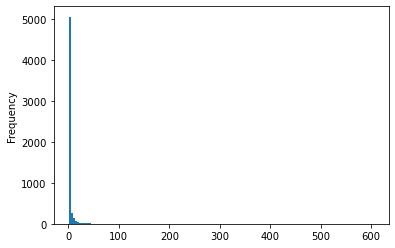

In [35]:
freqdf['count'].plot(kind='hist', bins=150)
print('Mean: ',freqdf['count'].mean())
print('Median: ',freqdf['count'].median())
print('Mode: ',freqdf['count'].mode())

In [36]:
# although this is very small, we are still able to see the skew, and the locations of the mean and median. 
# it is postiviely skewed since it is to the right. The mode and median is 1 and it is very evident. The locations 
# of the statistics seem to be illustrated accurately on the graph. 

In [37]:
freqdf['count'].std()
#standard deviation
#you can see that the plot has some spread and the standard deviation is 11.29 points away from the mean.

11.294176345933234

In [38]:
freqdf['count'].quantile(0.25)

1.0

In [39]:
freqdf['count'].quantile(0.75)

2.0

In [40]:
freqdf['count'].quantile(0.75) - freqdf['count'].quantile(0.25)
#Since the amount of words that are land on I, it makes sense that this result is 1. In any other case, it could be
#represented a bit better but I believe that this is the main reason the result is 1. 

1.0

# Foray into Machine Learning

In [67]:
from sklearn import datasets
import random
import numpy as np

In [42]:
df = datasets.load_diabetes(as_frame=True) 

In [43]:
features_df = df.data

In [44]:
target_df = df.target

In [45]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [46]:
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


<AxesSubplot:>

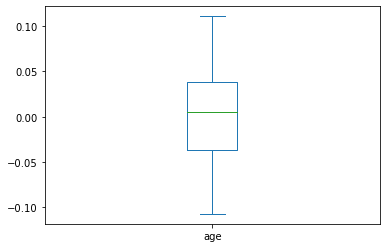

In [47]:
features_df["age"].plot(kind="box")

In [48]:
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [49]:
target_df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [50]:
target_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [51]:
import numpy as np

In [52]:
np.corrcoef(features_df['age'],target_df)

array([[1.        , 0.18788875],
       [0.18788875, 1.        ]])

In [53]:
np.corrcoef(features_df['sex'],target_df)

array([[1.      , 0.043062],
       [0.043062, 1.      ]])

In [54]:
np.corrcoef(features_df['bmi'],target_df)
#this has the greatest correlation within all the variables. 

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [55]:
np.corrcoef(features_df['bp'],target_df)

array([[1.        , 0.44148385],
       [0.44148385, 1.        ]])

In [56]:
np.corrcoef(features_df['s1'],target_df)

array([[1.        , 0.21202248],
       [0.21202248, 1.        ]])

In [57]:
np.corrcoef(features_df['s2'],target_df)

array([[1.        , 0.17405359],
       [0.17405359, 1.        ]])

In [58]:
np.corrcoef(features_df['s3'],target_df)

array([[ 1.        , -0.39478925],
       [-0.39478925,  1.        ]])

In [59]:
np.corrcoef(features_df['s4'],target_df)

array([[1.        , 0.43045288],
       [0.43045288, 1.        ]])

In [60]:
np.corrcoef(features_df['s5'],target_df)

array([[1.        , 0.56588343],
       [0.56588343, 1.        ]])

In [61]:
np.corrcoef(features_df['s6'],target_df)

array([[1.        , 0.38248348],
       [0.38248348, 1.        ]])

In [105]:
scatterdf = pd.DataFrame(features_df['bmi'], target_df, columns =["bmi"])

In [106]:
scatterdf.reset_index(inplace=True)

In [107]:
scatterdf.sort_index()

,target,bmi
0,151.0,-0.004050
1,75.0,-0.030996
2,141.0,0.047685
3,206.0,0.026128
4,135.0,0.056307
...,...,...
437,178.0,-0.008362
438,104.0,0.064930
439,132.0,-0.021295
440,220.0,-0.039618


In [108]:
print(scatterdf)

     target       bmi
0     151.0 -0.004050
1      75.0 -0.030996
2     141.0  0.047685
3     206.0  0.026128
4     135.0  0.056307
..      ...       ...
437   178.0 -0.008362
438   104.0  0.064930
439   132.0 -0.021295
440   220.0 -0.039618
441    57.0 -0.063330

[442 rows x 2 columns]


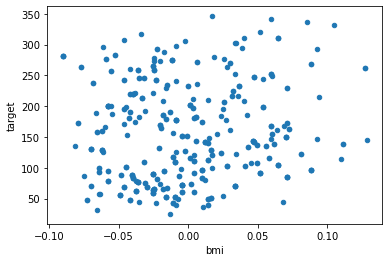

In [109]:
scatterdf.plot(kind='scatter',
              x='bmi',
              y='target');

The graph hows the values go in the same direction which shows it is a positive correlation. Although, everything seems to be very scattered which makes sense since the correlation is .58 which is considered to be a low correlation. 

In [63]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
X = features_df[['bmi']]
y = target_df

In [74]:
reg = LinearRegression().fit(X, y)

In [75]:
reg.coef_
#this is the coefficitent of the model. 

array([949.43526038])

In [76]:
reg.intercept_

152.1334841628967

In [77]:
ytrain = reg.intercept_ + reg.coef_ * X

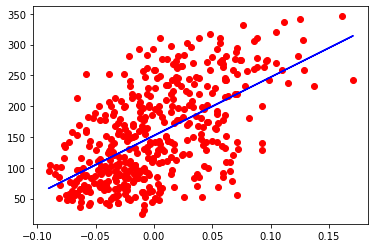

In [78]:
plt.plot(X,y,'ro',X,ytrain,'b-');

In [79]:
mean_squared_error(y, ytrain)

3890.4565854612724

In [80]:
r2_score(y, ytrain)

0.3439237602253803

In [82]:
X = features_df[['s3']]
y = target_df 
ytrain = reg.intercept_ + reg.coef_ * X

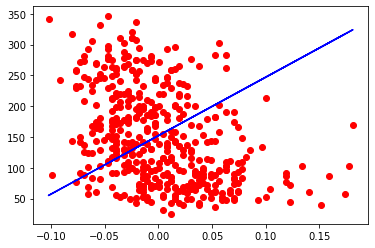

In [83]:
plt.plot(X,y,'ro',X,ytrain,'b-');

In [84]:
mean_squared_error(y, ytrain)

10715.137030516642

In [85]:
r2_score(y, ytrain)

-0.806972178515555

The r2 is negative in this instance of these variables meaning there is a little to no relationship between the two variables and it is doing worse then the mean squared values. After some research on the web about this negative r2 value, it simply means it does not follow the rend of the data. The data is slightly skewed left indicating that this has a negative correlation. The other linear regression has a positive r2 value indiciating that it properly fits the trend of the data. The fitted mean square increases a lot due to the alrge amount of variance between the two variables. 